In [1]:
# probability of a single disk failing in a year
p = 0.1

In [2]:
p_plot_min, p_plot_max = 1e-4, 2

In [3]:
n_list = list(range(1, 9))
n_list

[1, 2, 3, 4, 5, 6, 7, 8]

In [4]:
def get_raid_0_failure(n: int) -> float:
    # 1 - P(all working)
    # P(all working) = (1-p)^n
    return 1. - (1. - p) ** n

# floating point sums are inexact
# distributing data evenly among one disk = one disk
assert abs(get_raid_0_failure(n=1) - p) < 1e-6

In [5]:
def get_raid_1_failure(n: int) -> float:
    # P(none working) = p^n
    return p ** n

# floating point sums are inexact
# mirror data between one disk = one disk
assert abs(get_raid_1_failure(n=1) - p) < 1e-6

In [6]:
from scipy.stats import binom

def get_raid_4_failure(n: int) -> float:
    # = P(specific parity fail and >= 1 other fail) + P(specific parity working and >=2 other fail)
    if n >= 2:
        specific_parity_fail_case = p * (1. - (1. - p) ** (n - 1))
        specific_parity_working_case = (1 - p) * (1. - binom.cdf(k=2, n=n-1, p=(1.-p)))
        return specific_parity_fail_case + specific_parity_working_case

# floating point sums are inexact
# dedicated parity on one drive in a two drive array = mirroring
assert abs(get_raid_4_failure(n=2) - get_raid_1_failure(n=2)) < 1e-6

In [7]:
from scipy.stats import binom

def get_raid_5_failure(n: int) -> float:
    # P(more than 1 fail among n drives)
    if n >= 2:
        return 1. - binom.cdf(k=1, n=n, p=p)

# floating point sums are inexact
# dedicated parity on one drive in a two drive array = distributed parity in a two drive array
assert abs(get_raid_5_failure(n=2) - get_raid_1_failure(n=2)) < 1e-6, get_raid_5_failure(n=2)

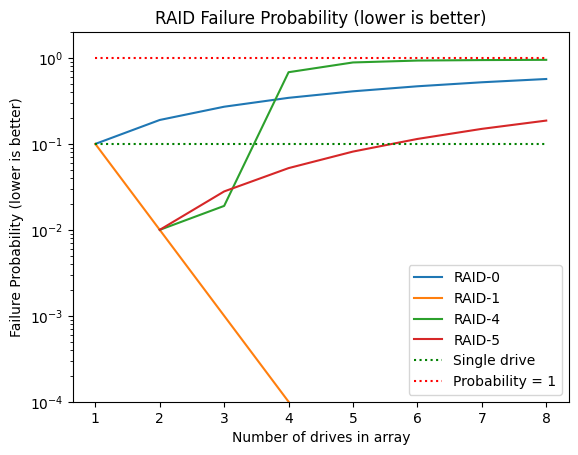

In [8]:
import matplotlib.pyplot as plt

plt.plot(n_list, list(map(get_raid_0_failure, n_list)), label='RAID-0')
plt.plot(n_list, list(map(get_raid_1_failure, n_list)), label='RAID-1')
plt.plot(n_list, list(map(get_raid_4_failure, n_list)), label='RAID-4')
plt.plot(n_list, list(map(get_raid_5_failure, n_list)), label='RAID-5')
plt.plot(n_list, [p]*len(n_list), label='Single drive', color='green', ls=':')
plt.plot(n_list, [1.]*len(n_list), label='Probability = 1', color='red', ls=':')

plt.title('RAID Failure Probability (lower is better)')
plt.legend()

plt.xlabel('Number of drives in array')

plt.ylabel('Failure Probability (lower is better)')
plt.ylim(p_plot_min, p_plot_max)
plt.yscale('log')

Text(0, 0.5, 'Space efficiency (higher is better)')

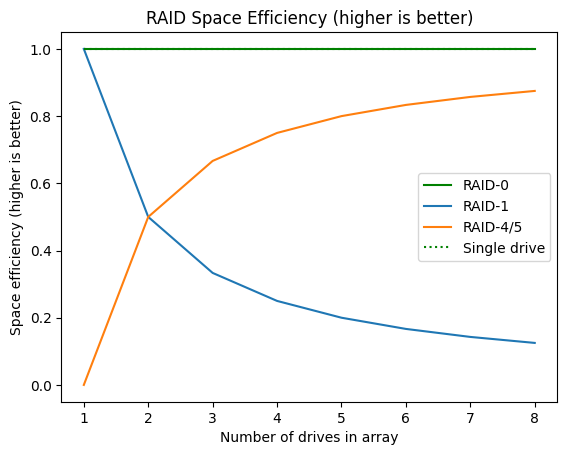

In [9]:
def get_raid_0_capacity(n: int) -> int:
    return n

def get_raid_1_capacity(n: int) -> int:
    return 1

def get_raid_4_or_5_capacity(n: int) -> int:
    return n-1

plt.plot(n_list, list(map(lambda n: get_raid_0_capacity(n) / n, n_list)), label='RAID-0', color='green')
plt.plot(n_list, list(map(lambda n: get_raid_1_capacity(n) / n, n_list)), label='RAID-1')
plt.plot(n_list, list(map(lambda n: get_raid_4_or_5_capacity(n) / n, n_list)), label='RAID-4/5')
plt.plot(n_list, [1.]*len(n_list), label='Single drive', color='green', ls=':')

plt.title('RAID Space Efficiency (higher is better)')
plt.legend()

plt.xlabel('Number of drives in array')

plt.ylabel('Space efficiency (higher is better)')

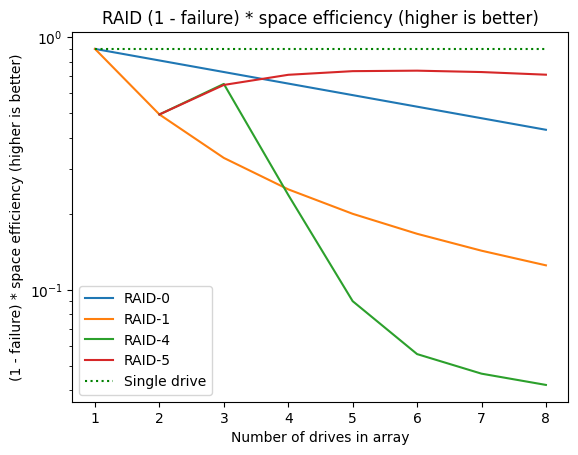

In [10]:
plt.plot(n_list, list(map(lambda n: (1. - get_raid_0_failure(n=n)) * get_raid_0_capacity(n) / n, n_list)), label='RAID-0')
plt.plot(n_list, list(map(lambda n: (1. - get_raid_1_failure(n=n)) * get_raid_1_capacity(n) / n, n_list)), label='RAID-1')
plt.plot(n_list, list(map(lambda n: (1. - get_raid_4_failure(n=n)) * get_raid_4_or_5_capacity(n) / n if n >= 2 else None, n_list)), label='RAID-4')
plt.plot(n_list, list(map(lambda n: (1. - get_raid_5_failure(n=n)) * get_raid_4_or_5_capacity(n) / n if n >= 2 else None, n_list)), label='RAID-5')
plt.plot(n_list, [(1. - p) * 1.]*len(n_list), label='Single drive', color='green', ls=':')

plt.title('RAID (1 - failure) * space efficiency (higher is better)')
plt.legend()

plt.xlabel('Number of drives in array')

plt.ylabel('(1 - failure) * space efficiency (higher is better)')
plt.yscale('log')